# Chemical Potentials and Sound Speeds
1. In this notebook, we have arrived at a way to calculate partial derivatives of chemical potentials. This is done by first calculating the chemical potentials symbolically. After we arrive at a symbolic expression for the chemical potential, we then can substitute in numerical values. 
2. Have attempted to calculate sound speed difference and get numerical results but do not match with expected results at the moment. 

In [1]:
# loading in useful, generic libraries 
from minimal import * 
from scipy import linalg

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [4]:
# initializing numerical eos object 
gm3 = eos(g_sigma_N = 8.784820, g_omega_N = 8.720086, g_rho_N = 8.544795, g_phi_N = 0.0, b = 0.008628, c = -0.002433,\
             g_sigma_H = 5.408849, g_omega_H = 5.813391, g_rho_H = 0.0, g_phi_H = -4.110688)

baryon_list = [Neutron, Proton]
meson_list = [sigma, omega, rho]
lepton_list = [electron]

independent_list = [nb, electron]
# choose baryons to be the dependent ones! 
dependent_list = [Neutron, Proton] 

##
1. Want to also be able to declare our independent variables.
2. Re-write the dependent variables in terms of independent variables. 

In [5]:
def baryon_num_cons(baryon_list):
    # takes list of baryons and returns baryon number conservation expression
    right = 0
    for baryon in baryon_list:
        right = baryon.frac + right 
    return sym.Eq(1, right)

In [6]:
def charge_cons(lepton_list, baryon_list):
    # takes list of both leptons and baryons and returns expression for charge conservation
    # Note: assumes that both lepton and baryon objects have a charge attribute
    
    positive, negative = 0, 0
    for lepton in lepton_list:
        if (lepton.charge > 0):
            positive = positive + lepton.frac
        elif (lepton.charge < 0):
            negative = negative + lepton.frac
    
    for baryon in baryon_list:
        if (baryon.charge > 0):
            positive = positive + baryon.frac
        elif (baryon.charge < 0):
            negative = negative + baryon.frac
    
    return sym.Eq(positive, negative)

In [10]:
# re-write proton and neutron number densities and fractions in terms of independent ones
proton_sym.num_density = nb.var*(xe.var)
proton_sym.frac = xe.var

neutron_sym.num_density = nb.var*(1 - xe.var - xl.var)
neutron_sym.frac = 1 - xe.var - xl.var

In [ ]:
independent_baryons = [Lambda]
dependent_baryons = baryon_list - independent_baryons  


def init_independent_vars(ind_var_list):
    # ind_var_list should be a list of fractions
    

In [14]:
def baryon_chemical_potential(baryon):
    if (baryon.kind == 'Nucleon'):
        #baryon.chem_pot = np.sqrt(baryon.kf**2 + baryon.mass_eff**2) + gm3.g_omega_N*omega_num.field\
        #            + gm3.g_phi_N*phi_num.field + baryon.isospin*gm3.g_rho_N*rho_num.field
        return np.sqrt(baryon.kf**2 + baryon.mass_eff**2) + gm3.g_omega_N*omega_num.field\
                    + gm3.g_phi_N*phi_num.field + baryon.isospin*gm3.g_rho_N*rho_num.field
    elif (baryon.kind == 'Hyperon'):
        #baryon.chem_pot = np.sqrt(baryon.kf**2 + baryon.mass_eff**2) + gm3.g_omega_N*omega_num.field\
        #            + gm3.g_phi_N*phi_num.field + baryon.isospin*gm3.g_rho_N*rho_num.field
        return np.sqrt(baryon.kf**2 + baryon.mass_eff**2) + gm3.g_omega_LA*omega_num.field\
                    + gm3.g_phi_LA*phi_num.field + baryon.isospin*gm3.g_rho_LA*rho_num.field
    
def baryon_chemical_potential_test(baryon):
    if (baryon.kind == 'Nucleon'):
        baryon.chem_pot = np.sqrt((baryon.kf-gm3.g_omega_N*omega_num.field - gm3.g_rho_N*rho_num.field*baryon.isospin)**2 + baryon.mass_eff**2) + gm3.g_omega_N*omega_num.field\
                     + baryon.isospin*gm3.g_rho_N*rho_num.field
        return np.sqrt((baryon.kf-gm3.g_omega_N*omega_num.field - gm3.g_rho_N*rho_num.field*baryon.isospin)**2 + baryon.mass_eff**2) + gm3.g_omega_N*omega_num.field\
                     + baryon.isospin*gm3.g_rho_N*rho_num.field
    elif (baryon.kind == 'Hyperon'):
        baryon.chem_pot = np.sqrt((baryon.kf-gm3.g_omega_LA*omega_num.field - gm3.g_rho_LA*rho_num.field*baryon.isospin)**2 + baryon.mass_eff**2) + gm3.g_omega_N*omega_num.field\
                     + baryon.isospin*gm3.g_rho_N*rho_num.field
        return np.sqrt(((baryon.kf-gm3.g_omega_LA*omega_num.field - gm3.g_rho_LA*rho_num.field*baryon.isospin)**2)**2 + baryon.mass_eff**2) + gm3.g_omega_LA*omega_num.field\
                    + baryon.isospin*gm3.g_rho_LA*rho_num.field
    
def lepton_chemical_potential(lepton):
    return np.sqrt(lepton.kf**2 + lepton.mass**2)

## Lepton/Electron Chemical Potential Derivative
$$
    \mu_e = \sqrt{k_{F_e}^2 + m_e^2} \qquad k_{F_e} = (3\pi^2 n_e)^{1/3} \qquad 
       n_e = n_B x_e
$$

In [15]:
def chem_pot_electron(x_j):
    # calculates derivative of electron chemical potential wrt variable x_j
    mu_e = sym.sqrt(electron_sym.kf**2 + electron_sym.mass**2)
    mu_e = mu_e.subs(electron_sym.kf, (3*Pi**2*sym.symbols('n_B')*electron_sym.frac)**(sym.S(1)/3))
    return mu_e.diff(x_j)

In [16]:
# sample 
chem_pot_electron(nb.var)

3**(2/3)*(n_B*pi**2*x_e)**(2/3)/(3*n_B*sqrt(m_e**2 + 3**(2/3)*(n_B*pi**2*x_e)**(2/3)))

# Working towards Baryon Chemical Potential Partial Derivatives
The Baryon chemical potential expression that we have is given by 
$$
    \mu_i = \mu_i^* + g_{\omega i}\omega_0 + g_{\phi i}\phi_0 + I_{3B}g_{\rho i}\rho_0 \qquad \mu_i^* = \sqrt{k_{F_i}^2 + {m_i^*}^2}
$$

Ultimately, we want to write down a function that takes a baryon $i$ and an independent variable $x_j$ and returns the partial derivative of the chemical potential of baryon $i$ with respect to $x_j$. That is,

$$
    \frac{\partial \mu_i}{\partial x_j} = \frac{\partial \mu_i^*}{\partial x_j} + \frac{\partial \mu_i^R}{\partial x_j}
$$

where 

$$
    \frac{\partial \mu_i^*}{\partial x_j} = \frac{\partial }{\partial x_j}\sqrt{k_{F_i}^2 + {m_i^*}^2}
    \qquad
    \frac{\partial \mu_i^R}{\partial x_j} = g_{\omega i}\frac{\partial \omega_0}{\partial x_j} + g_{\phi i}\frac{\partial \phi_0}{\partial x_j} + I_{3B}g_{\rho i}\frac{\partial \rho_0}{\partial x_j}
$$

This task is broken down as follows:
- Calculate  $\partial \mu_i^R/\partial x_j$ and $\partial \mu_i^*/\partial x_j$
    - For the first task, we need to calculate partial derivatives of meson fields and then multiply by relevant coupling constants 
    - For the second task, then need to find the partial derivative of the effective energy. This then amounts to finding the partial derivative of the sigma fields and partial derivatives of the Fermi momentum with respect to the independent variable.
    
With this in mind, let us start from the bottom and work ourselves back up.

## Task 1: Working Towards $\partial \mu^R_i/\partial x_j$

#### Task 1a: Calculating Partial Derivatives of Meson Fields with respect to independent variable $x_j$
1. Goal here: write a function that takes as input independent variable $x_j$ and returns $\partial \omega_0/\partial x_j$ and more.
2. At the moment, we have three functions. But in principle, they are all quite similar. Could try to generalize this by associating to each meson class object an 'Equation of state' function as well as their relevant coupling constants. Would allow us to condense these three equations into one single equation.

In [17]:
def partial_omega(baryon_list, x_j):
    # returns domega/dxj
    omega_sym.field = 0
    
    # equation of motion 
    for i in range(len(baryon_list)):
        if(baryon_list[i].kind == 'Nucleon'):
            omega_sym.field = gm3_sym.g_omega_N*nb.var*baryon_list[i].frac + omega_sym.field
        elif(baryon_list[i].kind == 'Hyperon'):
            omega_sym.field = gm3_sym.g_omega_LA*nb.var*baryon_list[i].frac + omega_sym.field
        
    omega_sym.field = 1/omega_sym.mass**2*omega_sym.field 

    # calculate partial derivative 
    return sym.collect(omega_sym.field.diff(x_j), gm3_sym.g_omega_N)

In [264]:
def partial_omega(nb, baryon_list, x_j):
    result = 0 
    
    for baryon in baryon_list:
        result += baryon.g_omega * nb.var * baryon.frac
    result = result/omega_sym.mass**2 
    
    return result.diff(x_j)  

In [18]:
def partial_rho(x_j):
    # returns drho/dxj
    rho_sym.field = 0 
    
    # equation of motion
    # in the future would be good to call the equation of motion directly here... from Lagrangian
    for i in range(len(baryon_list)):
        if(baryon_list[i].kind == 'Nucleon'):
            rho_sym.field = gm3_sym.g_rho_N*baryon_list[i].frac*nb.var*baryon_list[i].isospin + rho_sym.field
        elif(baryon_list[i].kind == 'Hyperon'):
            rho_sym.field = gm3_sym.g_rho_LA*baryon_list[i].frac*nb.var*baryon_list[i].isospin + rho_sym.field
    
    rho_sym.field = 1/rho_sym.mass**2*rho_sym.field
    
    # calculate partial derivative
    return sym.simplify(rho_sym.field.diff(x_j))

In [19]:
def partial_phi(x_j):
    # returns dmeson/dxj
    phi_sym.field = 0
    
    # equation of motion 
    for i in range(len(baryon_list)):
        if(baryon_list[i].kind == 'Nucleon'):
            phi_sym.field = gm3_sym.g_phi_N*baryon_list[i].frac*nb.var + phi_sym.field
        elif(baryon_list[i].kind == 'Hyperon'):
            phi_sym.field = gm3_sym.g_phi_LA*baryon_list[i].frac*nb.var + phi_sym.field
        
    phi_sym.field = 1/phi_sym.mass**2*phi_sym.field 
    
    # calculate partial derivative 
    return sym.simplify(phi_sym.field.diff(x_j))

### Task 1b: Arriving at expression for Partial Derivative of $\mu_i^R$
Where 
$$
    \mu_i^R = g_{\omega i}\omega + g_{\phi i}\phi + I_{3B}g_{\rho i}\rho
$$
and 
$$
    \frac{\partial \mu_i^R}{\partial x_j} = g_{\omega i}\frac{\partial \omega}{\partial x_j} + g_{\phi i}\frac{\partial \phi}{\partial x_j} + I_{3B}g_{\rho i}\frac{\partial \rho}{\partial x_j}
$$

In [20]:
def partial_mu_R(baryon_sym, x_j):
    # returns dmu_i^R/dx_j
    
    # checks if baryon is a nucleon or hyperon as they have different
    # coupling constants
    
    if(baryon_sym.kind == 'Nucleon'):
        return gm3_sym.g_omega_N*partial_omega(x_j) + gm3_sym.g_phi_N*partial_phi(x_j)\
            + baryon_sym.isospin*gm3_sym.g_rho_N*partial_rho(x_j)
    
    elif(baryon_sym.kind == 'Hyperon'):
        return gm3_sym.g_omega_LA*partial_omega(x_j) + gm3_sym.g_phi_LA*partial_omega(x_j)\
            + baryon_sym.isospin*gm3_sym.g_rho_LA*partial_rho(x_j)

## Task 2: Working towards $\partial \mu_i*/\partial x_j$
We have the following expression for 
$$
    \frac{\partial \mu_i'}{\partial x_j} = \frac{\partial }{\partial x_j}\sqrt{k_{F_i}^2 + {m_i^*}^2}
    = \frac{1}{2}\frac{k_{F_i}\dfrac{\partial k_{F_i}}{\partial x_j} - g_{\sigma i}m_i^* \dfrac{\partial\sigma}{\partial x_j}}{\sqrt{k_{F_i}^2 + {m_i^*}^2}}
$$
which depends on 
$$
    \frac{\partial k_{F_i}}{\partial x_j} \qquad \frac{\partial\sigma}{\partial x_j}
$$

### Task 2a: Calculating $\frac{\partial k_{F_i}}{\partial x_j}$ with respect to independent variables
1. We have two functions that can do this. First does this by substituting in fully for the Fermi momentum and asking python to take and return the derivative for us. The second function, we calculate the derivative by hand and write in it directly in terms of the Fermi momentum which is a cleaner result. The two results may look different but end up being equivalent. 

In [21]:
def partial_fermi_old(baryon_sym, x_j):
    # assumes baryon number density has already been re-written in terms of independent variables at the beginning
    kFi = (3*Pi**2*nb.var*baryon_sym.frac)**(sym.S(1)/3)
    return kFi.diff(x_j)

In [22]:
# sample: calculating derivative of proton momentum wrt to nB
partial_fermi_old(proton_sym, nb.var)

3**(1/3)*(n_B*pi**2*x_e)**(1/3)/(3*n_B)

In [23]:
def partial_fermi(baryon_sym, x_j):
    kFi_sort_of = (Pi**2*nb.var*baryon_sym.frac)/baryon_sym.kf**2
    return kFi_sort_of.diff(x_j)

In [24]:
# sample: calculating derivative of proton momentum wrt to nB
partial_fermi(proton_sym, nb.var)

pi**2*x_e/k_F_p**2

In [104]:
partial_fermi_old(lambda_sym, nb.var)

3**(1/3)*(n_B*pi**2*x_Lambda)**(1/3)/(3*n_B)

### Task 2b: Calculate $\partial \sigma/\partial x_j$
From the notes, we have
$$
    \frac{\partial \sigma}{\partial x_j} = \frac{\sum_i g_{\sigma i} \beta_i \dfrac{\partial k_{F_i}}{\partial x_j}}{m_\sigma^2 + \dfrac{\partial^2 U}{\partial \sigma^2} - \sum_i g_{\sigma i}\alpha_i}
$$
where
$$
    \alpha_i = \left[\frac{3}{2}\frac{g_{\sigma i}{m_i^*}^2}{\pi^2}
        \ln\frac{k_{F_i} + E_{F_i}}{m_i^*} -\frac{g_{\sigma i}}{\pi^2}\left(\frac{1}{2}k_{F_i}E_{F_i} + {m_i^*}^2\frac{k_{F_i}}{E_{F_i}}\right)\right]
$$
and
$$
    \beta_i = \frac{m_i^*}{\pi^2}\frac{k_{F_i}^2}{E_{F_i}}
$$

We have alpha given here but as we see, the code is a little ugly and redundant. We can improve this by using a sub class hopefully? Not esssential I guess.

In [25]:
def alpha(baryon_sym):
    # takes a baryon and returns alpha as defined above
    if (baryon_sym.kind == 'Nucleon'):
        g_sigma = gm3_sym.g_sigma_N 
    elif (baryon_sym.kind == 'Hyperon'):
        g_sigma = gm3_sym.g_sigma_LA 
        
    term1 = (sym.S(3)/2)*(1/Pi**2)*g_sigma*baryon_sym.mass_eff**2*sym.log((baryon_sym.kf + baryon_sym.ef)/baryon_sym.mass_eff)
    term2 = (sym.S(1)/2)*baryon_sym.kf*baryon_sym.ef 
    term3 = baryon_sym.mass_eff**2*baryon_sym.kf/baryon_sym.ef
    
    # return term1 - g_sigma/Pi**2*(term2 + term3)
    return 2*(term1 - g_sigma/Pi**2*(term2 + term3))

def beta(baryon_sym):
    # takes a baryon and returns beta as defined above
    #return baryon_sym.mass_eff*baryon_sym.kf**2/Pi**2/baryon_sym.ef
    return 2*baryon_sym.mass_eff*baryon_sym.kf**2/Pi**2/baryon_sym.ef

In [26]:
# samples 
alpha(proton_sym)

3*g_sigma_N*m_p^***2*log((E^*_F_p + k_F_p)/m_p^*)/pi**2 - 2*g_sigma_N*(E^*_F_p*k_F_p/2 + k_F_p*m_p^***2/E^*_F_p)/pi**2

In [27]:
# sample 
beta(lambda_sym)

2*k_F_Lambda**2*m_Lambda^*/(E^*_F_Lambda*pi**2)

Now that we have our two ''unknowns'' we can plug back into the specified expression for partial sigma.

In [28]:
def partial_sigma(x_j):
    # returns dsigma/dx_j
    
    numerator = 0 
    denominator = sigma_sym.mass**2 + sym.diff(U(sym.symbols('sigma')),sym.symbols('sigma'),sym.symbols('sigma'))
    for i in range(len(baryon_list)):
        if (baryon_list[i].kind == 'Nucleon'):
            numerator = numerator + gm3_sym.g_sigma_N*beta(baryon_list[i])*partial_fermi(baryon_list[i], x_j)
            denominator = denominator - gm3_sym.g_sigma_N*alpha(baryon_list[i])
        elif (baryon_list[i].kind == 'Hyperon'):
            numerator = numerator + gm3_sym.g_sigma_LA*beta(baryon_list[i])*partial_fermi(baryon_list[i], x_j)
            denominator = denominator - gm3_sym.g_sigma_LA*alpha(baryon_list[i])
    
    return numerator/denominator

In [58]:
# sample: calculating dsigma/dnB
partial_sigma(nb.var)

(2*g_sigma_N*m_p^**x_e/E^*_F_p + 2*g_sigma_N*m_n^**(-x_Lambda - x_e + 1)/E^*_F_n + 2*g_sigma_Lambda*m_Lambda^**x_Lambda/E^*_F_Lambda)/(-g_sigma_Lambda*(3*g_sigma_Lambda*m_Lambda^***2*log((E^*_F_Lambda + k_F_Lambda)/m_Lambda^*)/pi**2 - 2*g_sigma_Lambda*(E^*_F_Lambda*k_F_Lambda/2 + k_F_Lambda*m_Lambda^***2/E^*_F_Lambda)/pi**2) - g_sigma_N*(3*g_sigma_N*m_n^***2*log((E^*_F_n + k_F_n)/m_n^*)/pi**2 - 2*g_sigma_N*(E^*_F_n*k_F_n/2 + k_F_n*m_n^***2/E^*_F_n)/pi**2) - g_sigma_N*(3*g_sigma_N*m_p^***2*log((E^*_F_p + k_F_p)/m_p^*)/pi**2 - 2*g_sigma_N*(E^*_F_p*k_F_p/2 + k_F_p*m_p^***2/E^*_F_p)/pi**2) + m_sigma**2 + Derivative(U(sigma), (sigma, 2)))

In [30]:
load_values(100)

NameError: name 'load_values' is not defined

### Task 2c: Arriving at expression for $\partial \mu'_i/\partial x_j$
With both $    \frac{\partial k_{F_i}}{\partial x_j}$ and $\frac{\partial\sigma}{\partial x_j}$ in hand, we have 
$\partial \mu'_i/\partial x_j$ via 
$$
    \frac{\partial \mu_i'}{\partial x_j} = \frac{\partial }{\partial x_j}\sqrt{k_{F_i}^2 + {m_i^*}^2}
    = \frac{k_{F_i}\dfrac{\partial k_{F_i}}{\partial x_j} - g_{\sigma i}m_i^* \dfrac{\partial\sigma}{\partial x_j}}{\sqrt{k_{F_i}^2 + {m_i^*}^2}}
$$

In [31]:
def partial_mu_prime(baryon, x_j):
    if (baryon.kind == 'Nucleon'):
        return 1/sym.sqrt(baryon.kf**2 + baryon.mass_eff**2)*(baryon.kf*partial_fermi(baryon, x_j)\
                - gm3_sym.g_sigma_N*baryon.mass_eff*partial_sigma(x_j))
    elif (baryon.kind == 'Hyperon'):
        return 1/sym.sqrt(baryon.kf**2 + baryon.mass_eff**2)*(baryon.kf*partial_fermi(baryon, x_j)\
                - gm3_sym.g_sigma_LA*baryon.mass_eff*partial_sigma(x_j))

##  Adding $\partial \mu^*_i/\partial x_j$ and $\partial \mu^R_i/\partial x_j$ together to get the Chemical Potential Partial Derivative: $\partial \mu_i/\partial x_j$
From $$
    \frac{\partial \mu_i}{\partial x_j} = \frac{\partial \mu_i^*}{\partial x_j} + \frac{\partial \mu_i^R}{\partial x_j}
$$


In [32]:
def chem_pot_part_deriv(baryon, x_j):
    return partial_mu_prime(baryon, x_j) + partial_mu_R(baryon, x_j)

For visualization, we calculate the partial derivative of the proton chemical potential with respect to $n_B$. We see that it is not a fun expression. 

In [33]:
chem_pot_part_deriv(proton_sym, nb.var)

g_omega_N*(g_omega_Lamda*x_Lambda + g_omega_N*(1 - x_Lambda))/m_omega**2 + g_phi_N*(g_phi_Lambda*x_Lambda - g_phi_N*x_Lambda + g_phi_N)/m_phi**2 + 0.25*g_rho_N**2*(x_Lambda + 2*x_e - 1)/m_rho**2 + (-g_sigma_N*m_p^**(2*g_sigma_N*m_p^**x_e/E^*_F_p + 2*g_sigma_N*m_n^**(-x_Lambda - x_e + 1)/E^*_F_n + 2*g_sigma_Lambda*m_Lambda^**x_Lambda/E^*_F_Lambda)/(-g_sigma_Lambda*(3*g_sigma_Lambda*m_Lambda^***2*log((E^*_F_Lambda + k_F_Lambda)/m_Lambda^*)/pi**2 - 2*g_sigma_Lambda*(E^*_F_Lambda*k_F_Lambda/2 + k_F_Lambda*m_Lambda^***2/E^*_F_Lambda)/pi**2) - g_sigma_N*(3*g_sigma_N*m_n^***2*log((E^*_F_n + k_F_n)/m_n^*)/pi**2 - 2*g_sigma_N*(E^*_F_n*k_F_n/2 + k_F_n*m_n^***2/E^*_F_n)/pi**2) - g_sigma_N*(3*g_sigma_N*m_p^***2*log((E^*_F_p + k_F_p)/m_p^*)/pi**2 - 2*g_sigma_N*(E^*_F_p*k_F_p/2 + k_F_p*m_p^***2/E^*_F_p)/pi**2) + m_sigma**2 + Derivative(U(sigma), (sigma, 2))) + pi**2*x_e/k_F_p)/sqrt(k_F_p**2 + m_p^***2)

In [34]:
chem_pot_part_deriv(lambda_sym, nb.var)

g_omega_Lamda*(g_omega_Lamda*x_Lambda + g_omega_N*(1 - x_Lambda))/m_omega**2 + g_phi_Lambda*(g_omega_Lamda*x_Lambda + g_omega_N*(1 - x_Lambda))/m_omega**2 + (-g_sigma_Lambda*m_Lambda^**(2*g_sigma_N*m_p^**x_e/E^*_F_p + 2*g_sigma_N*m_n^**(-x_Lambda - x_e + 1)/E^*_F_n + 2*g_sigma_Lambda*m_Lambda^**x_Lambda/E^*_F_Lambda)/(-g_sigma_Lambda*(3*g_sigma_Lambda*m_Lambda^***2*log((E^*_F_Lambda + k_F_Lambda)/m_Lambda^*)/pi**2 - 2*g_sigma_Lambda*(E^*_F_Lambda*k_F_Lambda/2 + k_F_Lambda*m_Lambda^***2/E^*_F_Lambda)/pi**2) - g_sigma_N*(3*g_sigma_N*m_n^***2*log((E^*_F_n + k_F_n)/m_n^*)/pi**2 - 2*g_sigma_N*(E^*_F_n*k_F_n/2 + k_F_n*m_n^***2/E^*_F_n)/pi**2) - g_sigma_N*(3*g_sigma_N*m_p^***2*log((E^*_F_p + k_F_p)/m_p^*)/pi**2 - 2*g_sigma_N*(E^*_F_p*k_F_p/2 + k_F_p*m_p^***2/E^*_F_p)/pi**2) + m_sigma**2 + Derivative(U(sigma), (sigma, 2))) + pi**2*x_Lambda/k_F_Lambda)/sqrt(k_F_Lambda**2 + m_Lambda^***2)

# Numerical Calculations
1. We have a symbolic expression for the chemical potential partial derivatives. In this part, we want to then get the numerical expressions. We substitute in for all variables the values of the fields, masses, coupling constants, fractions, etc. The plan here is to take the data from the data file and for each data row (ie, for a given nB and other fixed fractions and stuff) and store that in the numeric baryon class. Assuming that is done, we can then perform the substitution.

## Loading in Data

In [32]:
data = pd.read_csv(r'/Users/vinhtran/Downloads/datafile_gm3.txt', sep=" ", header=0,\
                       names = ['nb/n0', 'P', 'E', 'Sigma', 'Rho','Omega', 'Phi', 'xn', 'xp',\
                            'xe', 'xL', 'fermi_n', 'fermi_p', 'fermi_e', 'fermi_L', 'nan'])
data

,nb/n0,P,E,Sigma,Rho,Omega,Phi,xn,xp,xe,xL,fermi_n,fermi_p,fermi_e,fermi_L,nan
0,0.28,0.070686,40.349774,8.198005,-2.328705,4.681230,-0.000000,0.990944,0.009056,0.009056,0.000000,212.949950,44.522679,44.522679,0.000000,NaN
1,0.29,0.080052,41.793525,8.453906,-2.409592,4.848417,-0.000000,0.990479,0.009521,0.009521,0.000000,215.421820,45.803502,45.803502,0.000000,NaN
2,0.30,0.090248,43.237612,8.707875,-2.490287,5.015604,-0.000000,0.990008,0.009992,0.009992,0.000000,217.835457,47.075844,47.075844,0.000000,NaN
3,0.31,0.101300,44.682054,8.959955,-2.570788,5.182791,-0.000000,0.989530,0.010470,0.010470,0.000000,220.194014,48.339953,48.339953,0.000000,NaN
4,0.32,0.113235,46.126866,9.210186,-2.651092,5.349977,-0.000000,0.989046,0.010954,0.010954,0.000000,222.500376,49.596057,49.596057,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,7.96,424.462572,1518.141189,76.157712,-19.387450,110.614440,-18.722709,0.390550,0.103000,0.103000,0.506450,476.509635,305.580406,305.580406,519.627154,NaN
769,7.97,425.578051,1520.582346,76.195184,-19.389709,110.732982,-18.763248,0.390156,0.102934,0.102934,0.506910,476.548918,305.642795,305.642795,520.001921,NaN
770,7.98,426.695085,1523.024904,76.232608,-19.391960,110.851508,-18.803800,0.389763,0.102868,0.102868,0.507369,476.588102,305.705038,305.705038,520.376269,NaN
771,7.99,427.813675,1525.468863,76.269983,-19.394204,110.970019,-18.844365,0.389371,0.102802,0.102802,0.507827,476.627187,305.767137,305.767137,520.750198,NaN


Extract each column and store into its own array

In [33]:
nb_array = data.loc[:,'nb/n0'].values
P_array = data.loc[:,'P'].values
E_array = data.loc[:,'E'].values
sigma_array = data.loc[:,'Sigma'].values
rho_array = data.loc[:,'Rho'].values
omega_array = data.loc[:,'Omega'].values
phi_array = data.loc[:,'Phi'].values

neutron_frac = data.loc[:, 'xn'].values
proton_frac = data.loc[:, 'xp'].values
electron_frac = data.loc[:, 'xe'].values
lambda_frac = data.loc[:, 'xL'].values

fermi_n = data.loc[:, 'fermi_n'].values
fermi_p = data.loc[:, 'fermi_p'].values
fermi_e = data.loc[:, 'fermi_e'].values
fermi_L = data.loc[:, 'fermi_L'].values

#### Define a load values function
1. Each row in the table of data above represents a given instance of the system. We can then load in all the values in a given row into our numerical baryon, lepton, independent variables objects. The function takes an integer as argument which corresponds to the index/row number. 

In [39]:
def load_values(i):
    # load in values to numerical baryon object from data table 
    
    n0 = 0.153
    
    # re-write baryon density in MeV^3 
    # this would yield the correct fermi momentum values as given in the data
    nb.num_val = nb_array[i]*n0*hc**3
    
    # allocate values
    
    # meson field values 
    sigma_num.field = sigma_array[i]
    rho_num.field = rho_array[i]
    omega_num.field = omega_array[i]
    phi_num.field = phi_array[i]
    
    # particle fractions
    neutron_num.frac = neutron_frac[i]
    proton_num.frac = proton_frac[i]
    electron_num.frac = electron_frac[i]
    lambda_num.frac = lambda_frac[i]
    
    # particle fermi momentum 
    neutron_num.kf = fermi_n[i]
    proton_num.kf = fermi_p[i]
    electron_num.kf = fermi_e[i]
    lambda_num.kf = fermi_L[i]
    
    # effective masses
    neutron_num.mass_eff = neutron_num.mass - gm3.g_sigma_N*sigma_array[i]
    proton_num.mass_eff = proton_num.mass - gm3.g_sigma_N*sigma_array[i]
    lambda_num.mass_eff = lambda_num.mass - gm3.g_sigma_LA*sigma_array[i]
    
    # need to fill in eff values!!
    neutron_num.ef = np.sqrt(neutron_num.kf**2 + neutron_num.mass_eff**2)
    proton_num.ef = np.sqrt(neutron_num.kf**2 + proton_num.mass_eff**2)
    lambda_num.ef = np.sqrt(neutron_num.kf**2 + lambda_num.mass_eff**2)
        
    # can fill in chemical potentials 
    neutron_num.chem_pot = baryon_chemical_potential(neutron_num)
    proton_num.chem_pot = baryon_chemical_potential(proton_num)
    lambda_num.chem_pot = baryon_chemical_potential(lambda_num)
    
    # can fill in num. densities, although we don't use them directly as we re-write everything
    # in terms of nB, xe
    neutron_num.num_density = nb.num_val*neutron_num.frac
    proton_num.num_density = nb.num_val*proton_num.frac
    lambda_num.num_density = nb.num_val*lambda_num.frac

## Numerical Methods

### Numerical Electron Chemical Potential Function

In [40]:
def chem_pot_electron_num(ind_var):
    # takes symbolic electron chemical potential partial derivative
    # and returns numeric expression using information stored in electron_sym and 
    # electron_num objects. Idea is that electron_sym contains symbols like m_e and electron_num contains
    # numerical values for those symbols like: m_e = 0.510 MeV
    
    # load in symbolic expression 
    
    symbolic = chem_pot_electron(ind_var)

    # replace symbolic variables using sympy subs method 
    symbolic = symbolic.subs([(Pi, np.pi), (electron_sym.mass, electron_num.mass),\
        (electron_sym.frac, electron_num.frac), (nb.var, nb.num_val)])
    
    return sym.simplify(symbolic)

### Numerical Baryon Chemical Potential Derivative Function
1. We have the symbolic expresison for the partial derivative of a baryon chemical potential given previously in terms of symbols. This function replaces the symbolic values with their respective numeric values. 

In [41]:
def chem_pot_part_deriv_num(baryon, x_j):
    # substitute in numerical values and get a numerical 
    # result for partial derivative of baryon wrt to independent variable 
    
    # call the symbolic expression 
    symbolic_part_deriv = chem_pot_part_deriv(baryon, x_j)
    
    # replace Pi using subs 
    symbolic_part_deriv = symbolic_part_deriv.subs(Pi, np.pi)
    
    # replace baryon masses
    for i in range(len(baryon_list)):
        symbolic_part_deriv = symbolic_part_deriv.subs(baryon_list[i].mass, baryon_num_list[i].mass)

    # replace coupling constants
    symbolic_part_deriv = symbolic_part_deriv.subs([(gm3_sym.g_sigma_N, gm3.g_sigma_N),\
                                (gm3_sym.g_sigma_LA, gm3.g_sigma_LA), (gm3_sym.g_omega_N, gm3.g_omega_N),\
                                (gm3_sym.g_omega_LA, gm3.g_omega_LA), (gm3_sym.g_phi_N, gm3.g_phi_N),\
                                (gm3_sym.g_phi_LA, gm3.g_phi_LA), (gm3_sym.g_rho_N, gm3.g_rho_N),\
                                (gm3_sym.g_rho_LA, gm3.g_rho_LA)])

    # replace meson field masses
    symbolic_part_deriv = symbolic_part_deriv.subs([(omega_sym.mass, omega_num.mass), (sigma_sym.mass, sigma_num.mass),\
                                                   (phi_sym.mass, phi_num.mass), (rho_sym.mass, rho_num.mass)])

    
    # replace effective mass 
    for i in range(len(baryon_list)):
        if (baryon.kind == "Nucleon"):
            symbolic_part_deriv = symbolic_part_deriv.subs(baryon_list[i].mass_eff,\
                                                           baryon_num_list[i].mass - gm3.g_omega_N*sigma_num.field)
        elif (baryon.kind == "Hyperon"):
            symbolic_part_deriv = symbolic_part_deriv.subs(baryon_list[i].mass_eff,\
                                                           baryon_num_list[i].mass - gm3.g_omega_LA*sigma_num.field)

    # replace fermi momentum
    for i in range(len(baryon_list)):
        symbolic_part_deriv = symbolic_part_deriv.subs(baryon_list[i].kf, baryon_num_list[i].kf)
    
    
    # replace effective energy
    for i in range(len(baryon_list)):
        symbolic_part_deriv = symbolic_part_deriv.subs(baryon_list[i].ef, baryon_num_list[i].ef)
    
    # replace baryon number density
    #for i in range(len(baryon_list)):
    #    symbolic_part_deriv = symbolic_part_deriv.subs(baryon_list[i].num_density, baryon_num_list[i].num_density)
    
    
    # replace particle fractions 
    for i in range(len(baryon_list)):
        symbolic_part_deriv = symbolic_part_deriv.subs(baryon_list[i].frac, baryon_num_list[i].frac)
    for i in range(len(lepton_list)):
        symbolic_part_deriv = symbolic_part_deriv.subs(lepton_list[i].frac, lepton_num_list[i].frac)
    
    # replace partial derivative of U self energy
    symbolic_part_deriv = symbolic_part_deriv.subs(sym.diff(U(sym.symbols('sigma')),sym.symbols('sigma'),sym.symbols('sigma')),\
                                                  2*gm3.b*gm3.g_sigma_N**3*sigma_num.field + 3*gm3.c*gm3.g_sigma_N**4*sigma_num.field**2)
    
    symbolic_part_deriv = symbolic_part_deriv.subs(nb.var, nb.num_val)
    
    return symbolic_part_deriv

In [69]:
symbolic_part_deriv = chem_pot_part_deriv(proton_sym, nb.var)
symbolic_part_deriv

g_omega_N*(g_omega_Lamda*x_Lambda + g_omega_N*(1 - x_Lambda))/m_omega**2 + g_phi_N*(g_phi_Lambda*x_Lambda - g_phi_N*x_Lambda + g_phi_N)/m_phi**2 + 0.25*g_rho_N**2*(x_Lambda + 2*x_e - 1)/m_rho**2 + (-g_sigma_N*m_p^**(2*g_sigma_N*m_p^**x_e/E^*_F_p + 2*g_sigma_N*m_n^**(-x_Lambda - x_e + 1)/E^*_F_n + 2*g_sigma_Lambda*m_Lambda^**x_Lambda/E^*_F_Lambda)/(-g_sigma_Lambda*(3*g_sigma_Lambda*m_Lambda^***2*log((E^*_F_Lambda + k_F_Lambda)/m_Lambda^*)/pi**2 - 2*g_sigma_Lambda*(E^*_F_Lambda*k_F_Lambda/2 + k_F_Lambda*m_Lambda^***2/E^*_F_Lambda)/pi**2) - g_sigma_N*(3*g_sigma_N*m_n^***2*log((E^*_F_n + k_F_n)/m_n^*)/pi**2 - 2*g_sigma_N*(E^*_F_n*k_F_n/2 + k_F_n*m_n^***2/E^*_F_n)/pi**2) - g_sigma_N*(3*g_sigma_N*m_p^***2*log((E^*_F_p + k_F_p)/m_p^*)/pi**2 - 2*g_sigma_N*(E^*_F_p*k_F_p/2 + k_F_p*m_p^***2/E^*_F_p)/pi**2) + m_sigma**2 + Derivative(U(sigma), (sigma, 2))) + pi**2*x_e/k_F_p)/sqrt(k_F_p**2 + m_p^***2)

In [70]:
# replace Pi using subs 
symbolic_part_deriv = symbolic_part_deriv.subs(Pi, np.pi)
    
# replace baryon masses
for i in range(len(baryon_list)):
    symbolic_part_deriv = symbolic_part_deriv.subs(baryon_list[i].mass, baryon_num_list[i].mass)

# replace coupling constants
symbolic_part_deriv = symbolic_part_deriv.subs([(gm3_sym.g_sigma_N, gm3.g_sigma_N),\
                            (gm3_sym.g_sigma_LA, gm3.g_sigma_LA), (gm3_sym.g_omega_N, gm3.g_omega_N),\
                            (gm3_sym.g_omega_LA, gm3.g_omega_LA), (gm3_sym.g_phi_N, gm3.g_phi_N),\
                            (gm3_sym.g_phi_LA, gm3.g_phi_LA), (gm3_sym.g_rho_N, gm3.g_rho_N),\
                            (gm3_sym.g_rho_LA, gm3.g_rho_LA)])

# replace meson field masses
symbolic_part_deriv = symbolic_part_deriv.subs([(omega_sym.mass, omega_num.mass), (sigma_sym.mass, sigma_num.mass),\
                                (phi_sym.mass, phi_num.mass), (rho_sym.mass, rho_num.mass)])

In [71]:
symbolic_part_deriv

-1.05558885110024e-5*x_Lambda + 6.15732177365703e-5*x_e + 9.3240897492775e-5 + (-8.78482*m_p^**(17.56964*m_p^**x_e/E^*_F_p + 17.56964*m_n^**(-x_Lambda - x_e + 1)/E^*_F_n + 10.817698*m_Lambda^**x_Lambda/E^*_F_Lambda)/(2.96421683340944*E^*_F_Lambda*k_F_Lambda + 7.8192660309548*E^*_F_n*k_F_n + 7.8192660309548*E^*_F_p*k_F_p - 8.89265050022833*m_Lambda^***2*log((E^*_F_Lambda + k_F_Lambda)/m_Lambda^*) - 23.4577980928644*m_n^***2*log((E^*_F_n + k_F_n)/m_n^*) - 23.4577980928644*m_p^***2*log((E^*_F_p + k_F_p)/m_p^*) + Derivative(U(sigma), (sigma, 2)) + 302500.0 + 15.6385320619096*k_F_p*m_p^***2/E^*_F_p + 15.6385320619096*k_F_n*m_n^***2/E^*_F_n + 5.92843366681889*k_F_Lambda*m_Lambda^***2/E^*_F_Lambda) + 9.86960440108936*x_e/k_F_p)/sqrt(k_F_p**2 + m_p^***2)

In [73]:
# replace effective mass 
for i in range(len(baryon_list)):
    if (baryon.kind == "Nucleon"):
        symbolic_part_deriv = symbolic_part_deriv.subs(baryon_list[i].mass_eff,\
                                                           baryon_num_list[i].mass - gm3.g_omega_N*sigma_num.field)
    elif (baryon.kind == "Hyperon"):
        symbolic_part_deriv = symbolic_part_deriv.subs(baryon_list[i].mass_eff,\
                                                           baryon_num_list[i].mass - gm3.g_omega_LA*sigma_num.field)

AttributeError: type object 'baryon' has no attribute 'kind'

## Tilde Chemical Potentials
After having found numerical values for the chemical potential partial derivatives, we can then take the appropriate linear combinations to get 
$$
    \frac{\partial \tilde{\mu}_{x_e}}{\partial x_j} \qquad \frac{\partial \tilde{\mu}_{x_\Lambda}}{\partial x_j} \qquad x_j = n_B, x_e, x_\Lambda
$$

In [42]:
def partial_mu_x_e_tilde(x_j):
    # returns numerical values for the tilde chemical potentials
    result = -chem_pot_part_deriv_num(neutron_sym, x_j) + chem_pot_part_deriv_num(proton_sym, x_j)\
        + chem_pot_electron_num(x_j)
    return sym.N(result)

def partial_mu_x_l_tilde(x_j):
    # returns numerical values for the tilde chemical potentials
    result = - chem_pot_part_deriv_num(neutron_sym, x_j) + chem_pot_part_deriv_num(lambda_sym, x_j)
    return sym.N(result)

In [70]:
load_values(100)

# System of Equations for $dx_j/dn_B$
We have two equations here:
$$
    \frac{\partial \tilde{\mu}_{x_e}}{\partial n_B} = -\sum_j \frac{\partial \tilde{\mu}_{x_e}}{\partial x_j}\frac{dx_j}{dn_B} \qquad j \in \text{ind. vars.}
$$
and
$$
    \frac{\partial \tilde{\mu}_{x_\Lambda}}{\partial n_B} = -\sum_j \frac{\partial \tilde{\mu}_{x_\Lambda}}{\partial x_j}\frac{dx_j}{dn_B} \qquad j \in \text{ind. vars.}
$$
And our goal is to solve for $dx_j/dn_B$.

In [39]:
total_deriv_ind_var = [sym.diff(xe.func(nb.var), nb.var), sym.diff(xl.func(nb.var), nb.var)]

Write out explicit expressions for the two equations in our system. 

In [107]:
load_values(221)

In [40]:
def expression_xe(independent_variables, total_deriv_ind_var):
    expression = 0.0 
    for i in range(len(independent_variables)-1):
        expression = partial_mu_x_e_tilde(independent_variables[i+1].var)*total_deriv_ind_var[i] + expression
    return partial_mu_x_e_tilde(nb.var) + expression 

def expression_xl(independent_variables, total_deriv_ind_var):
    expression = 0.0 
    for i in range(len(independent_variables)-1):
        expression = partial_mu_x_l_tilde(independent_variables[i+1].var)*total_deriv_ind_var[i] + expression
    return partial_mu_x_l_tilde(nb.var) + expression 

In [108]:
partial_mu_x_l_tilde(nb.var)

-0.000283436459165771

Function to load in the expressions and solve the system of two linear equations for $dx_j/dn_B$

In [41]:
def numerical_total_deriv(independent_variables, total_deriv_ind_var):
    # return numerical values for total derivatives of ind. vars with respect to nB
    
    eqn1 = expression_xe(independent_variables, total_deriv_ind_var)
    eqn2 = expression_xl(independent_variables, total_deriv_ind_var)

    #expr = sym.linsolve([eqn1, eqn2], (total_deriv_ind_var))
    expr = sym.solve([eqn1, eqn2], (total_deriv_ind_var), dict = 'True')
    
    independent_variables[1].total_deriv = expr[0][total_deriv_ind_var[0]]
    independent_variables[2].total_deriv = expr[0][total_deriv_ind_var[1]]

In [42]:
def numerical_2():
    eqn1 = expression_xe(independent_variables, total_deriv_ind_var)
    eqn2 = expression_xl(independent_variables, total_deriv_ind_var)
    expr = sym.solve([eqn1, eqn2], (total_deriv_ind_var), dict = 'True')
    
    xe.total_deriv = expr[0][total_deriv_ind_var[0]]
    xl.total_deriv = expr[0][total_deriv_ind_var[1]]

In [56]:
eqn1 = expression_xe(independent_variables, total_deriv_ind_var)
eqn2 = expression_xl(independent_variables, total_deriv_ind_var)
expr = sym.solve([eqn1, eqn2], (total_deriv_ind_var), dict = 'True')

# System of Linear Equations for $dx_j/dn_B$ Attempt 2
We have two equations here:
$$
    \frac{\partial \tilde{\mu}_{x_e}}{\partial x_e}\frac{dx_e}{dn_B}
    + \frac{\partial \tilde{\mu}_{x_e}}{\partial x_\Lambda}\frac{dx_\Lambda}{dn_B} = - \frac{\partial \tilde{\mu}_{x_e}}{\partial n_B} 
$$
and
$$
    \frac{\partial \tilde{\mu}_{x_\Lambda}}{\partial x_e}\frac{dx_e}{dn_B} + \frac{\partial \tilde{\mu}_{x_\Lambda}}{\partial x_\Lambda}\frac{dx_\Lambda}{dn_B} = - \frac{\partial \tilde{\mu}_{x_\Lambda}}{\partial n_B}
$$
And our goal is to solve for $dx_j/dn_B$. We can re-write this as a matrix equation $A x = b$ with 
$$
    \begin{pmatrix}
       \dfrac{\partial \tilde{\mu}_{x_e}}{\partial x_e} & \dfrac{\partial \tilde{\mu}_{x_e}}{\partial x_\Lambda}\\
        \dfrac{\partial \tilde{\mu}_{x_\Lambda}}{\partial x_e} &\dfrac{\partial \tilde{\mu}_{x_\Lambda}}{\partial x_\Lambda}
    \end{pmatrix}
    \begin{pmatrix}
    \dfrac{dx_e}{dn_B}\\
    \dfrac{dx_\Lambda}{dn_B}
    \end{pmatrix}
    = -
    \begin{pmatrix}
     \dfrac{\partial \tilde{\mu}_{x_e}}{\partial n_B} \\
     \dfrac{\partial \tilde{\mu}_{x_\Lambda}}{\partial n_B}
    \end{pmatrix}
$$
so we can approach this in the following manner
1. First construct A by constructing each element
2. Construct b by constructing each element
3. Pass A,B, x to a Scipy Linear Algebra solver

In [159]:
load_values(500)

In [147]:
def A_gen(chem_pot_list, ind_var_list):
    # pass a list of chem_pot_list functions 
    A = np.zeros((len(chem_pot_list), len(ind_var_list)), dtype = 'float')
    
    for i in range(len(A[:,0])):
        for j in range(len(A[0,:])):
            A[i,j] = chem_pot_list[i](ind_var_list[j])
            
    return A 

In [162]:
def b_vector(chem_pot_list):
    b = np.zeros(len(chem_pot_list), dtype = 'float')
    for i in range(len(b)):
        b[i] = chem_pot_list[i](sym.symbols('n_B'))
    return -b

In [194]:
def numerical_3(chem_pot_list, ind_var_list):
    A = A_gen(chem_pot_list, ind_var_list)
    b = b_vector(chem_pot_list)
    #C = linalg.solve(A,b)
    #xe.total_deriv = C[0]
    #xl.total_deriv = C[1]
    
    C = linalg.lstsq(A,b)
    xe.total_deriv = C[0][0]
    xl.total_deriv = C[0][1]

In [198]:
load_values(550)
numerical_3(chem_pot_list, ind_var_list)
xe.total_deriv

-8.831651418873358e-08

In [202]:
baryon_chemical_potential(neutron_num)

1399.3818121175666

## Sound Speed Difference
With both numerical values for $\partial\tilde{\mu_i}/\partial x_j$ and $dx_j/dn_B$ ($i$ a baryon, $j$ an independent variable), we can then plug into our expression for the sound speed difference to find
$$
    c_s^2 - c_e^2 = - \frac{n_B^2}{\mu_n}
    \left[\frac{\partial \tilde{\mu}_{x_e}}{\partial n_B}\frac{dx_e}{dn_B} + \frac{\partial \tilde{\mu}_{x_\Lambda}}{\partial n_B}\frac{dx_\Lambda}{dn_B}\right]
$$

In [122]:
def sound_speed_diff(integer):
    # first load in numerical values 
    load_values(integer)
    expression = 0.0
    
    # find total derivatives dx_j/dnB
    numerical_total_deriv(independent_variables, total_deriv_ind_var)
    
    # get expression inside of sum 
    expression = partial_mu_x_e_tilde(nb.var)*xe.total_deriv + partial_mu_x_l_tilde(nb.var)*xl.total_deriv
    
    return -nb.num_val**2/baryon_chemical_potential(neutron_num)*expression 

In [181]:
def sound_speed_diff_3(integer):
    # first load in numerical values 
    load_values(integer)
    expression = 0.0
    
    # find total derivatives dx_j/dnB
    chem_pot_list = [partial_mu_x_e_tilde, partial_mu_x_l_tilde]
    ind_var_list = [sym.symbols('x_e'), sym.symbols('x_Lambda')]
    
    numerical_3(chem_pot_list, ind_var_list)
    
    # get expression inside of sum 
    expression = partial_mu_x_e_tilde(nb.var)*xe.total_deriv + partial_mu_x_l_tilde(nb.var)*xl.total_deriv
    
    return -nb.num_val**2/baryon_chemical_potential(neutron_num)*expression 

In [195]:
sound_speed_diff_3(550)

27.5129621111297

## Attempt at calculating $c_s^2 - c_e^2$ as a function of $n_B$

In [205]:
nb_data = np.zeros(10)
sound_diff = np.zeros(10)

for i in range(len(nb_data)):
    nb_data[i] = nb_array[50*i+220]
    sound_diff[i] = sound_speed_diff(50*i+220)

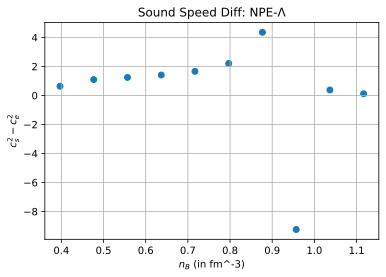

In [211]:
plt.scatter(nb_data*0.16, sound_diff)
plt.xlabel('$n_B$ (in fm^-3)')
plt.grid(True)
plt.ylabel('$c_s^2 - c_e^2$')
plt.title('Sound Speed Diff: NPE-$\Lambda$')
plt.savefig('/Users/vinhtran/Desktop/Yay/Plots/NPE-LA.pdf')
plt.show()

# Trouble Shooting

### NPE Matter Sound Speed Difference
At lower densities, before the Lambda hyperon appears, we have
$$
    c_s^2 - c_e^2 = -\frac{n_B^2}{\mu_n}\left[\frac{\partial\tilde{\mu}_{x_e}}{\partial n_B}\frac{dx_e}{dn_B}\right]
    = \frac{n_B^2}{\mu_n}\left[\frac{\partial\tilde{\mu}_{x_e}}{\partial n_B}^2/\frac{\partial\tilde{\mu}_{x_e}}{\partial x_e}\right]
$$
That is, we only have npe matter and hence just two independent variables: $n_B, x_e$. 
This seems like a critically important thing to keep in mind. At different densities, we have different compositions, so we need to modify our equations. Plotting the data we get results that match qualitatively but not numerically.
- OKAY. So we did some sketchy thing there we divided through by $n_s = 0.153$ for the sound speed difference and we got a perfect match. Not sure why this works! But cool! So NPE matter we're good.
    - Might be important for figuring out why this is for the case of Lambda having that discontinuity. 
- Need to figure this out for NPE-Lambda matter. 
- But this is hopeful because we used the same chemical potential derivative calculators for baryons so it seems to suggest that our expressions are correct for the derivatives. It might then be an issue with adding the Lambda hyperon
    - What does adding this do?
        - Equation of motion for sigma field changes
        - Lambda chemical potential derivatives?
        - Lambda total derivative term? 
        - tilde chemical potential derivative of lambda term?
        - System of linear equation changes. Lots of things to consider when solving this! And hence sound speed expression. 
        - Beta equilibrium conditions on chemical potentials!
        
- One other thing:
$$
    \frac{\partial \mu_i}{\partial n_B} = \infty 
$$
if $k_{F_i} = 0$ which is why we can't include Lambda hyperon at the start which makes sense... 


- One other concern: 
    - The modification of the $\partial \sigma/\partial x_i$ terms for different composition. This sorts itself out automatically since it's dependent on fraction $x_i$, momenta $k_{F_i}$ and $\log((E^*_i + k_{F_i})/m_i^*)$. For the latter case, if $k_{F_i} = 0$, we have
    $$
        \ln \frac{E^*_i + k_{F_i}}{m_i^*} = 
        \ln \frac{\sqrt{k_{F_i}^2 + {m_i^*}^2} + k_{F_i}}{m_i^*} = \ln(1) = 0
    $$

In [48]:
def sound_speed_npe(integer):
    load_values_2(integer)
    expression = partial_mu_x_e_tilde(nb.var)**2/partial_mu_x_e_tilde(xe.var)
    return nb.num_val**2/baryon_chemical_potential(neutron_num)*expression 

In [47]:
nb_npe_data = np.zeros(10)
sound_npe_diff = np.zeros(10)

for i in range(len(nb_data)):
    nb_npe_data[i] = nb_array[20*i]
    sound_npe_diff[i] = sound_speed_npe(20*i)

NameError: name 'nb_data' is not defined

In [64]:
def load_values_2(i):
    # load in values to numerical baryon object from data table 
    
    n0 = 0.153
    
    # re-write baryon density in MeV^3 
    # this would yield the correct fermi momentum values as given in the data
    nb.num_val = nb_array[i]*n0*hc**3
    
    # allocate values
    
    # meson field values 
    sigma_num.field = sigma_array[i]
    omega_num.field = omega_array[i]
    rho_num.field = 0.0
    phi_num.field = 0.0
    
    # particle fractions
    neutron_num.frac = neutron_frac[i]
    proton_num.frac = proton_frac[i]
    electron_num.frac = electron_frac[i]
    
    # particle fermi momentum 
    neutron_num.kf = fermi_n[i]
    proton_num.kf = fermi_p[i]
    electron_num.kf = fermi_e[i]
    
    # effective masses
    neutron_num.mass_eff = neutron_num.mass - gm3.g_sigma_N*sigma_array[i]
    proton_num.mass_eff = proton_num.mass - gm3.g_sigma_N*sigma_array[i]
    
    # need to fill in eff values!!
    neutron_num.ef = np.sqrt(neutron_num.kf**2 + neutron_num.mass_eff**2)
    proton_num.ef = np.sqrt(neutron_num.kf**2 + proton_num.mass_eff**2)
        
    # can fill in chemical potentials 
    neutron_num.chem_pot = baryon_chemical_potential(neutron_num)
    proton_num.chem_pot = baryon_chemical_potential(proton_num)
    
    # can fill in num. densities, although we don't use them directly as we re-write everything
    # in terms of nB, xe
    neutron_num.num_density = nb.num_val*neutron_num.frac
    proton_num.num_density = nb.num_val*proton_num.frac

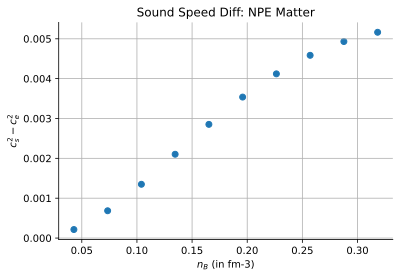

In [236]:
plt.scatter(nb_npe_data*0.153, sound_npe_diff)
plt.xlabel('$n_B$ (in fm-3)')
plt.ylabel('$c_s^2 - c_e^2$')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Sound Speed Diff: NPE Matter')
plt.grid(True)
plt.savefig('/Users/vinhtran/Desktop/Yay/Plots/npe.pdf')
plt.show()

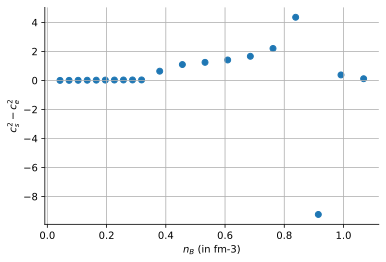

In [231]:
nb_combined = np.concatenate((nb_npe_data , nb_data))
sound_diff_combined = np.concatenate((sound_npe_diff/0.153, sound_diff))

plt.scatter(nb_combined*0.153, sound_diff_combined)
plt.xlabel('$n_B$ (in fm-3)')
plt.ylabel('$c_s^2 - c_e^2$')
plt.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

## Sound Speeds NPE

In [36]:
data = pd.read_csv(r'/Users/vinhtran/Documents/Yay/npe_data.csv')
data

,Unnamed: 0,nB/n0,sigma field (MeV),omega field (MeV),Neutron kF (MeV),Proton kF (MeV),electron kF (MeV),Neutron frac,Proton frac,electron frac
0,0,0.27,66.773033,4.753631,209.864042,53.764241,53.764241,0.983464,0.016536,0.016536
1,1,0.28,67.863436,4.929692,212.318579,55.974682,55.974682,0.982006,0.017994,0.017994
2,2,0.29,68.908444,5.105752,214.706247,58.178700,58.178700,0.980492,0.019508,0.019508
3,3,0.30,69.910003,5.281813,217.030732,60.372732,60.372732,0.978928,0.021072,0.021072
4,4,0.31,70.869960,5.457873,219.295469,62.553352,62.553352,0.977317,0.022683,0.022683
5,5,0.32,71.790079,5.633933,221.503669,64.717313,64.717313,0.975666,0.024334,0.024334
6,6,0.33,72.672047,5.809994,223.658343,66.861574,66.861574,0.973979,0.026021,0.026021
7,7,0.34,73.517488,5.986054,225.762323,68.983323,68.983323,0.972263,0.027737,0.027737
8,8,0.35,74.327962,6.162115,227.818276,71.079997,71.079997,0.970523,0.029477,0.029477
9,9,0.36,75.104972,6.338175,229.828719,73.149296,73.149296,0.968765,0.031235,0.031235


In [65]:
nb_array = data.loc[:,'nB/n0'].values
sigma_array = data.loc[:,'sigma field (MeV)'].values
omega_array = data.loc[:,'omega field (MeV)'].values

neutron_frac = data.loc[:, 'Neutron frac'].values
proton_frac = data.loc[:, 'Proton frac'].values
electron_frac = data.loc[:, 'electron frac'].values

fermi_n = data.loc[:, 'Neutron kF (MeV)'].values
fermi_p = data.loc[:, 'Proton kF (MeV)'].values
fermi_e = data.loc[:, 'electron kF (MeV)'].values

In [66]:
nb_npe_data = np.zeros(22)
sound_npe_diff = np.zeros(22)

for i in range(len(nb_npe_data)):
    nb_npe_data[i] = nb_array[i]
    sound_npe_diff[i] = sound_speed_npe(i)

In [67]:
partial_mu_x_e_tilde(nb.var)

nan

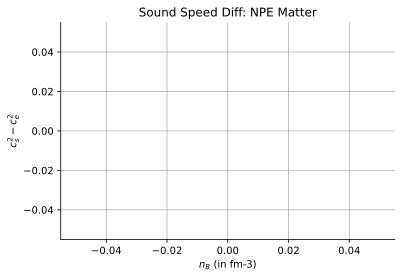

In [51]:
plt.scatter(nb_npe_data*0.153, sound_npe_diff)
plt.xlabel('$n_B$ (in fm-3)')
plt.ylabel('$c_s^2 - c_e^2$')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Sound Speed Diff: NPE Matter')
plt.grid(True)
#plt.savefig('/Users/vinhtran/Desktop/Yay/Plots/npe_new.pdf')
plt.show()

# Trouble Shooting